# Process Digital Elevation Models (DEM) for input into SLAMM

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rx

In [2]:
# data paths
RAW_DATA = "../data/raw/"
CLEAN_DATA = "../data/clean/"

# Read in dems
cc1_dem = rx.open_rasterio(RAW_DATA + 'dem/cc1_2_dem.tif')
ma2_dem = rx.open_rasterio(RAW_DATA + 'dem/ma_2_dem.tif')
ri2_dem = rx.open_rasterio(RAW_DATA + 'dem/ri_2_dem_2016.tif')

### Process DEMs

1. Cropped DEM raster to saltmarsh extent in ArcMap.

2. Only keep all areas less than 60ft (60 ft = 18.288 m)

In [6]:
def clean_dem(dem, output_dem_path: str):
    dem_60 = dem.where(dem<=18.288)
    dem_60.rio.write_nodata(-9999, encoded=True, inplace=True)
    dem_60.rio.to_raster(output_dem_path, dtype='int32')

In [ ]:
clean_dem(cc1_dem, CLEAN_DATA + "dem/cc1_dem_2011.asc")
clean_dem(cc1_dem, CLEAN_DATA + "dem/cc1_dem_2011.tif")

clean_dem(ma2_dem, CLEAN_DATA + "dem/ma2_dem.asc")
clean_dem(ma2_dem, CLEAN_DATA + "dem/ma2_dem.tif")

clean_dem(ri2_dem, CLEAN_DATA + "dem/ri2_dem.asc")
clean_dem(ri2_dem, CLEAN_DATA + "dem/ri2_dem.tif")

### Calculate slope

In [2]:
import richdem as rd
import matplotlib.pyplot as plt

In [8]:
def calc_slope(dem_file_path: str, output_slope_path: str):

    # calculate and save the slope
    dem_rd = rd.LoadGDAL(dem_file_path)
    slope = rd.TerrainAttribute(dem_rd, attrib='slope_degrees')
    rd.SaveGDAL(output_slope_path, slope)

    # plot the slope
    rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
    plt.show()
    

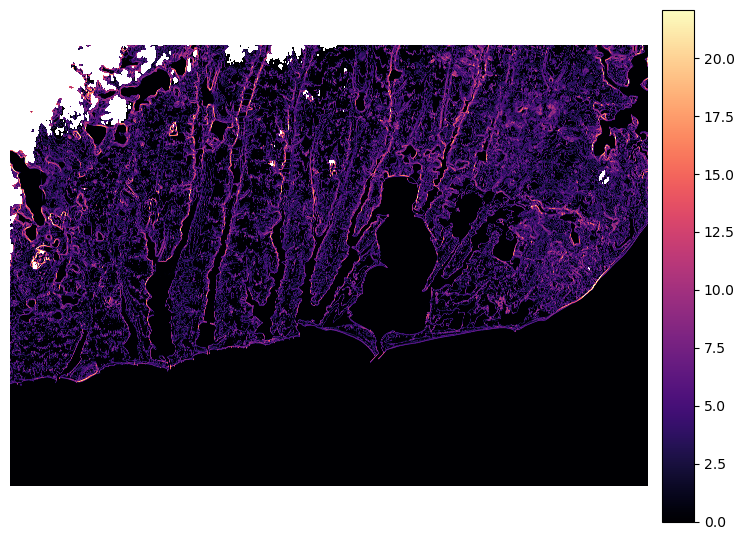

In [ ]:
calc_slope(CLEAN_DATA + "dem/cc1_dem.tif", CLEAN_DATA + "dem/cc1_slope.tif")

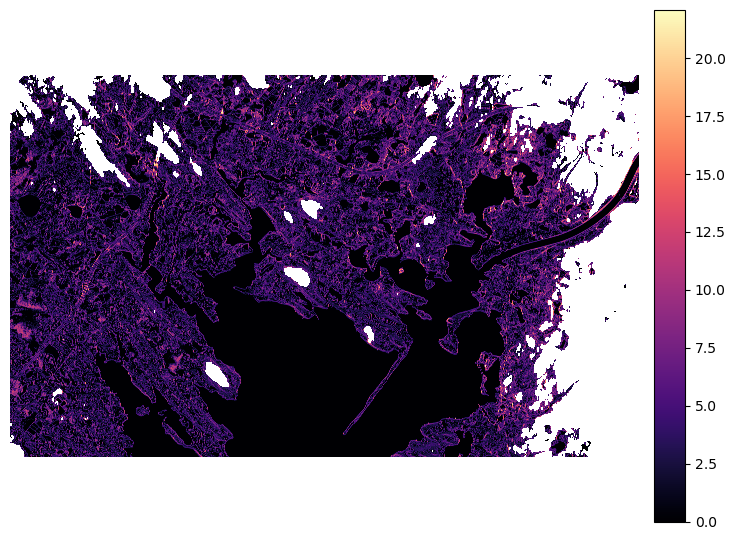

In [ ]:
calc_slope(CLEAN_DATA + "dem/ma2_dem.tif", CLEAN_DATA + "dem/ma2_slope.tif")

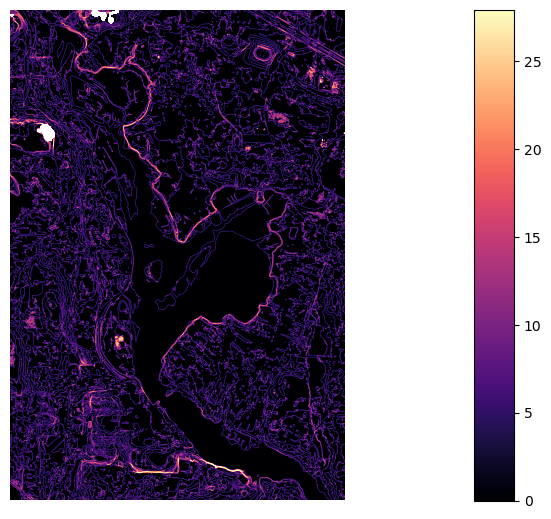

In [ ]:
calc_slope(CLEAN_DATA + "dem/ri2_dem.tif", CLEAN_DATA + "dem/ri2_slope.tif")

Fix NA value for slope rasters

In [ ]:
# Read in dems
cc1_slope = rx.open_rasterio(CLEAN_DATA + 'dem/cc1_slope.tif')
cc1_slope.rio.to_raster(CLEAN_DATA + "dem/cc1_slope.asc")

In [ ]:
ma2_slope = rx.open_rasterio(CLEAN_DATA + 'dem/ma2_slope.tif')
ma2_slope.rio.to_raster(CLEAN_DATA + "dem/ma2_slope.asc")

In [ ]:
ri2_slope = rx.open_rasterio(CLEAN_DATA + 'dem/ri2_slope.tif')
ri2_slope.rio.to_raster(CLEAN_DATA + "dem/ri2_slope.asc")

Create digital elevation maps

In [9]:
import matplotlib 
import matplotlib.pyplot as plt
import contextily as cx

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_contour_map(dem_path, which_marsh):

    # for ri
    #raw_dem = rx.open_rasterio(RAW_DATA + 'dem/ri_2_dem_2016.tif')
    #dem_18_up = raw_dem.where(raw_dem>18.288)
    #dem_18_up = dem_18_up.where(dem_18_up.isnull(), other=19)

    dem = rx.open_rasterio(dem_path)
    #dem_18_up = dem.where(dem>18.288)
    #dem_18_up = dem.where(dem>10)
    #dem_18_up = dem_18_up.where(dem_18_up.isnull(), other=19)
    #dem_18_up = dem_18_up.where(dem_18_up.isnull(), other=7)
    dem_vals = dem[0]#.values[0,::-1,:]

    fig = plt.figure(figsize = (12, 8))
    ax = fig.add_subplot(111)
    c = ax.contourf(dem_vals.x, dem_vals.y, dem_vals, cmap = "viridis", 
                levels = list(np.arange(0, 10, 0.5)))
               # levels = list(np.arange(0, 24, 2))) # RI2
               # levels = list(np.arange(0, 19, 1)))
  #  ax.contourf(dem_18_up[0].x, dem_18_up[0].y, dem_18_up.values[0], cmap="gray")
    cbar = plt.colorbar(c)
    cbar.set_label('Meters above sea level')
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs = dem.rio.crs, zoom=14)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    fig.savefig(f"../output/{which_marsh}/{which_marsh}_dem_u10.png", dpi=350, bbox_inches="tight")

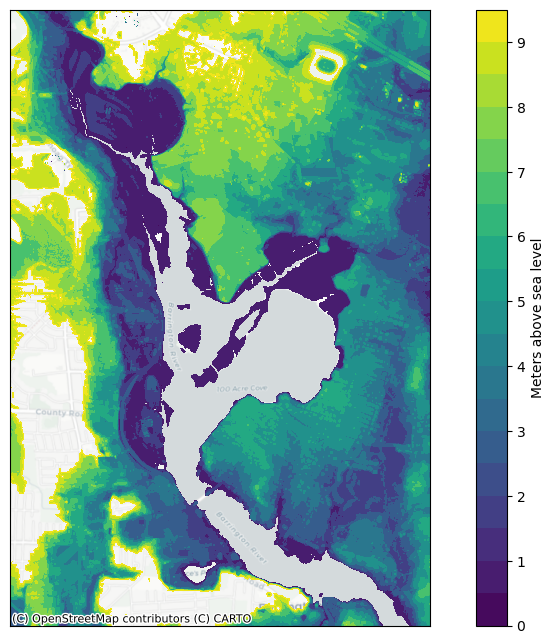

In [40]:
make_contour_map(CLEAN_DATA + 'dem/ri2_dem.asc', 'ri2')

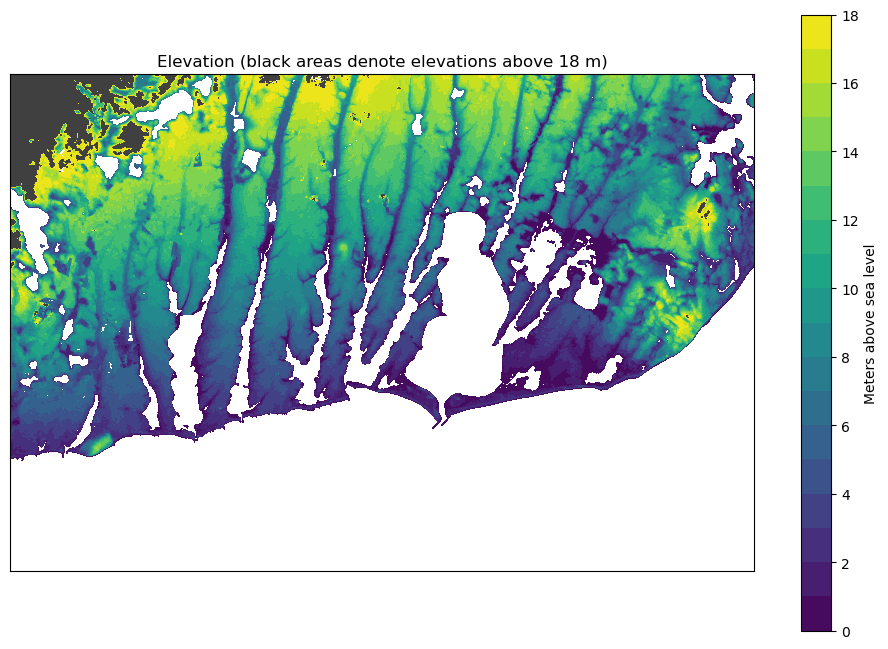

In [83]:
make_contour_map(RAW_DATA + 'dem/cc1_dem_2011.tif', 'cc1')

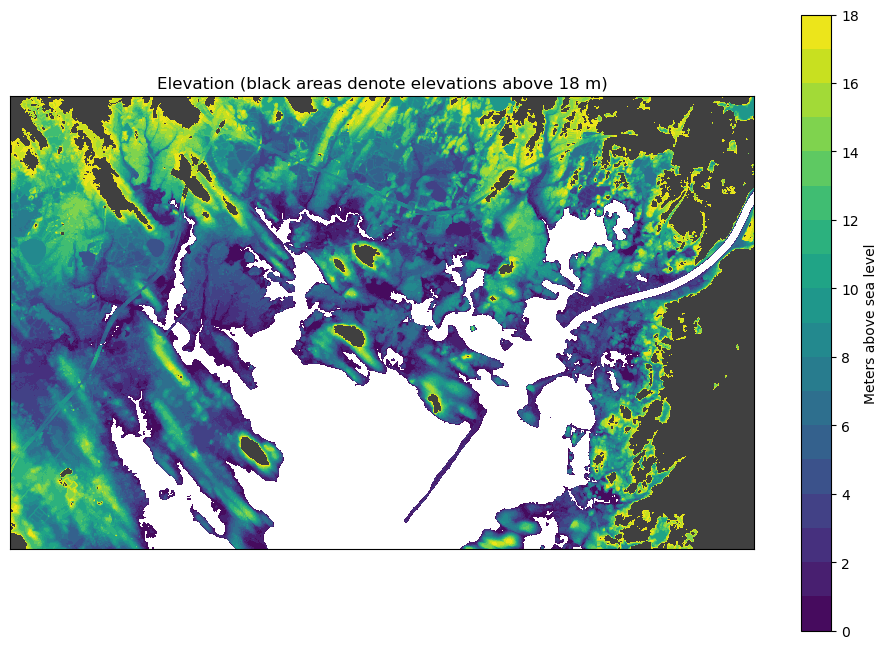

In [84]:
make_contour_map(RAW_DATA + 'dem/ma_2_dem.tif', 'ma2')